In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

# for regression modeling
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# for statistical analysis
import statsmodels.api as sm
from statsmodels.formula.api import ols

from warnings import filterwarnings

filterwarnings('ignore')

In [31]:
# Create sample data
np.random.seed(42)
X = np.random.randn(100, 1) * 10
y = 2 * X.squeeze() + 1 + np.random.randn(100) * 2

In [32]:
X.shape

(100, 1)

In [33]:
y.shape

(100,)

In [34]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [35]:
# initialize and fit model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [36]:
# print coefficients
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_[0]}")

Intercept: 1.1857351168641819
Coefficient: 1.9681035717455904


In [38]:
# Make predictions
y_pred = model.predict(X_test)
y_pred

array([ -9.01435956,  13.22415801,   8.29837494, -12.98154446,
       -27.91310898,   5.06016813,   2.51476013,  -3.13763515,
        -7.93480505,  10.9615841 , -16.68511915, -10.65647421,
        31.97954279, -19.63111145,   3.09632183,  -3.42264581,
         2.89891158,  -4.69903923,   5.94780323,  37.64048822,
        19.5142924 ,  -9.24049438, -21.46701059,  -1.09034286,
       -11.51088982,  -9.88066583,  15.71952225,   7.01368887,
        11.86387871,   0.48064156])

In [39]:
# Evaluate the model
mse      = mean_squared_error(y_test, y_pred)
r2       = r2_score(y_test, y_pred)
print(f"MSE: {mse:.4f}")
print(f"R^2 Score: {r2:.4f}")

MSE: 3.4154
R^2 Score: 0.9845


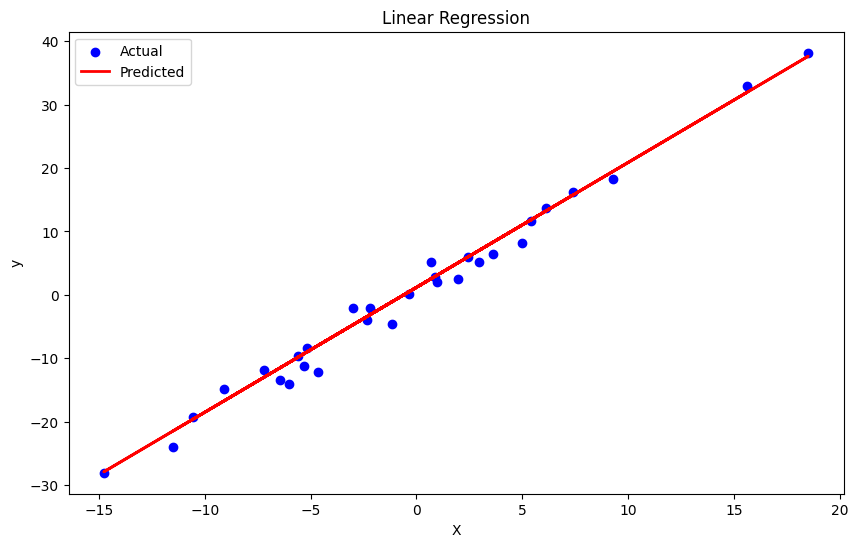

In [40]:
# Visualize results
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.show()

In [44]:
df = pd.DataFrame({"X": X.squeeze(), 'y':y})
model = ols('y ~ X', data=df).fit()

# get summary
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     8798.
Date:                Sat, 12 Apr 2025   Prob (F-statistic):           9.27e-98
Time:                        23:41:38   Log-Likelihood:                -205.02
No. Observations:                 100   AIC:                             414.0
Df Residuals:                      98   BIC:                             419.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0149      0.191      5.309      0.0

In [49]:
sm.stats.anova_lm(model, typ=1)

,df,sum_sq,mean_sq,F,PR(>F)
X,1.0,31731.8094,31731.8094,8798.1072,9.2652e-98
Residual,98.0,353.4530,3.6067,NaN,NaN


In [53]:
# create SAS-like ANOVA table
def create_anova_table(model):
    # Get model statistics
    anova_table = sm.stats.anova_lm(model, typ=1)
    
    # Calculate additional statistics
    df_total = anova_table['df'].sum()
    ss_total = anova_table['sum_sq'].sum()
    ms_model = anova_table['sum_sq'][0] / anova_table['df'][0]
    ms_error = anova_table['sum_sq'][1] / anova_table['df'][1]
    ms_total = ss_total / df_total
    f_value = ms_model / ms_error
    p_value = model.f_pvalue
    r_squared = model.rsquared
    adj_r_squared = model.rsquared_adj
    
    # Create a more SAS-like format
    sas_anova = pd.DataFrame({
        'Source': ['Model', 'Error', 'Corrected Total'],
        'DF': [anova_table['df'][0], anova_table['df'][1], df_total],
        'Sum of Squares': [anova_table['sum_sq'][0], anova_table['sum_sq'][1], ss_total],
        'Mean Square': [ms_model, ms_error, np.nan],
        'F Value': [f_value, np.nan, np.nan],
        'Pr > F': [p_value, np.nan, np.nan]
    })
    
    # Format the table nicely
    pd.set_option('display.precision', 4)
    
    # Create the parameter estimates table (similar to SAS)
    parameter_table = pd.DataFrame({
        'Parameter': ['Intercept'] + model.model.exog_names[1:],
        'Estimate': model.params,
        'Standard Error': model.bse,
        't Value': model.tvalues,
        'Pr > |t|': model.pvalues
    })
    
    return sas_anova, parameter_table, r_squared, adj_r_squared

In [54]:
# Generate and print the SAS-like ANOVA table
anova_table, parameter_table, r_squared, adj_r_squared = create_anova_table(model)

C:\Users\riain\AppData\Local\Temp\ipykernel_51048\1849937594.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ms_model = anova_table['sum_sq'][0] / anova_table['df'][0]
C:\Users\riain\AppData\Local\Temp\ipykernel_51048\1849937594.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ms_error = anova_table['sum_sq'][1] / anova_table['df'][1]
C:\Users\riain\AppData\Local\Temp\ipykernel_51048\1849937594.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position,